In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from scipy import stats


In [2]:
#Q1
#load the dataset
df = pd.read_csv('/Users/qin/Desktop/clean_kaggle_data.csv')
df

/Users/qin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,25967,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15387,25968,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15388,25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15389,25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [3]:
#display some statistical summaries
df.describe()
#display with main characteristics
#selected characteristics: Country-Q3, Age-Q1, Education-Q4, Professional Experience-Q6, Salary-Q25
ead=df[['Q3', 'Q1', 'Q4', 'Q6', 'Q25']]
ead.describe()

,Q25
count,15391.000000
mean,49116.009356
std,98090.207788
min,1000.000000
25%,2000.000000
50%,15000.000000
75%,60000.000000
max,1000000.000000


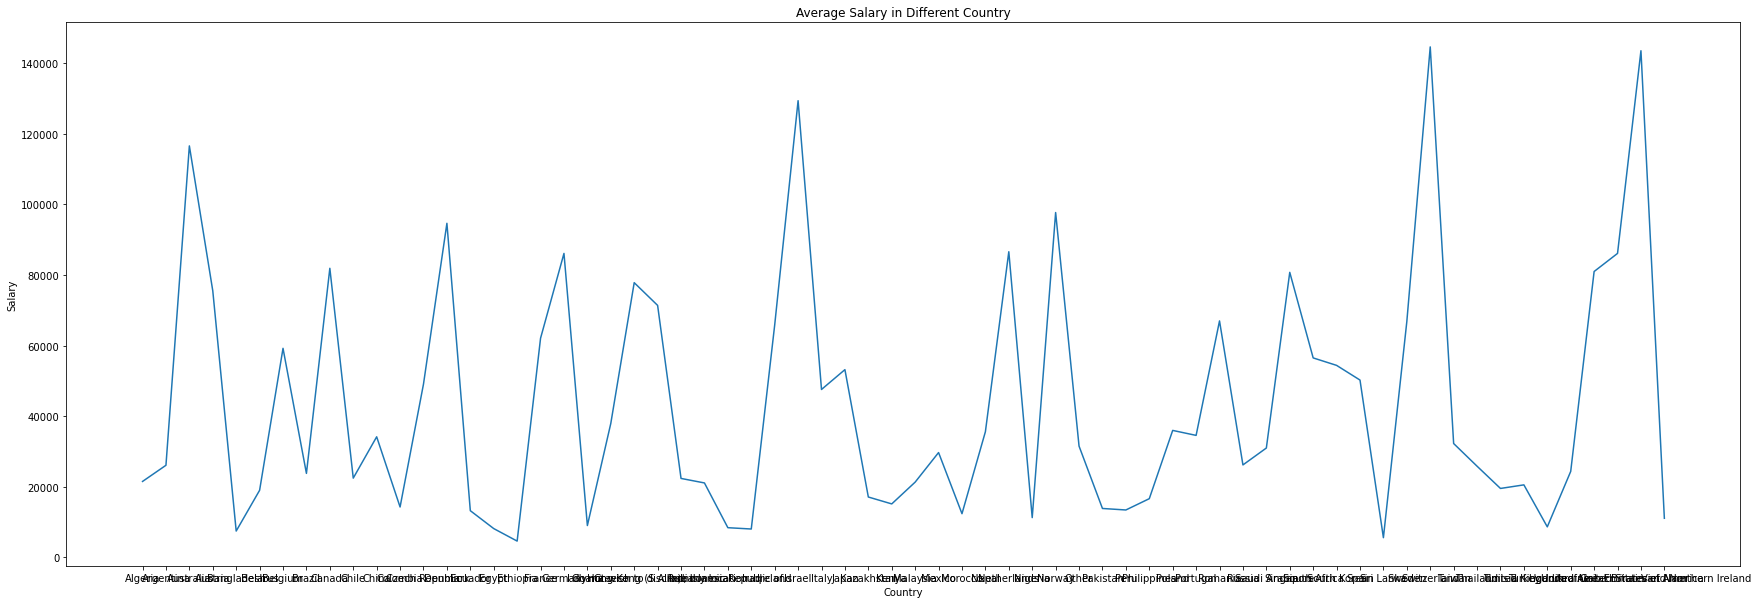

10 highest mean salary countries:                                                               Q25
Q3                                                               
Switzerland                                         144548.076923
United States of America                            143463.685637
Israel                                              129322.916667
Australia                                           116520.512821
Norway                                               97653.846154
Denmark                                              94605.263158
Netherlands                                          86555.555556
United Kingdom of Great Britain and Northern Ir...   86084.022039
Germany                                              86079.192547
Canada                                               81865.638767 
10 lowest mean salary countries:                                        Q25
Q3                                        
Nigeria                       11280.600462
Viet Nam   

In [4]:
#Country-Q3, Age-Q1, Education-Q4, Professional Experience-Q6, Salary-Q25
#graphic figure of Country vs Salary (Q3&Q25)
#select country and salary columns from df
df_country=df[['Q3','Q25']].groupby('Q3').mean() #group by country and take the mean
#plot
plt.figure(figsize=(30, 10))
plt.plot(df_country)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title("Average Salary in Different Country")
plt.show()
#print countries with the hightest 10 and lowest 10 salaries
df_country.sort_values(by = ['Q25'], ascending = False, inplace = True)
print('10 highest mean salary countries:',df_country.head(10),'\n10 lowest mean salary countries:',df_country.tail(10))

                 Q25
Q1                  
70+    100469.072165
55-59   97216.269841
60-69   87435.022026
45-49   82403.593339
50-54   82304.677623
40-44   67760.798429
35-39   59316.265060
30-34   47932.025895
25-29   29213.910355
22-24   19918.738050
18-21   15722.878625


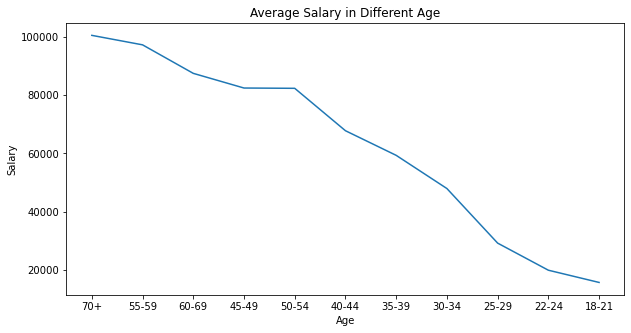

In [5]:
#graphic figure of Age vs Salary (Q1&Q25)
#select age and salary columns from df
df_age=df[['Q1','Q25']].groupby('Q1').mean() #group by age and take the mean
df_age.sort_values(by = ['Q25'], ascending = False, inplace = True)
print(df_age)
#plot
plt.figure(figsize=(10, 5))
plt.plot(df_age)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Average Salary in Different Age")
plt.show()

                                                             Q25
Q4                                                              
Bachelor’s degree                                   35578.291815
Doctoral degree                                     70641.181777
I prefer not to answer                              34191.616766
Master’s degree                                     52706.868657
No formal education past high school                38208.333333
Professional doctorate                              67465.517241
Some college/university study without earning a...  41990.616622


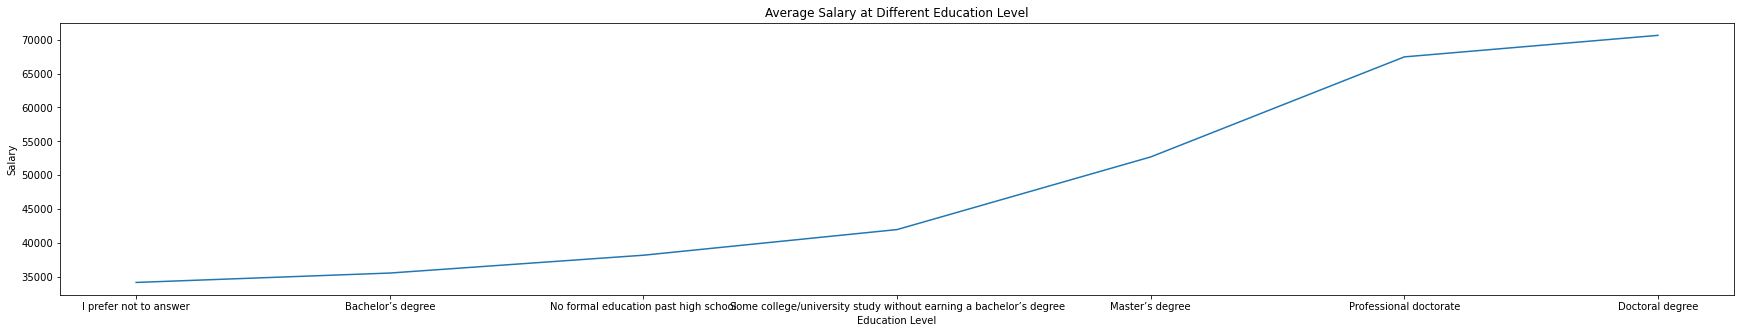

In [6]:
#graphic figure of Education vs Salary (Q4&Q25)
#select education and salary columns from df
df_edu=df[['Q4','Q25']].groupby('Q4').mean() #group by age and take the mean
print(df_edu)
#change to ascending order
df_edu.sort_values(by = ['Q25'], ascending = True, inplace = True)
#plot
plt.figure(figsize=(30, 5))
plt.plot(df_edu)
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title("Average Salary at Different Education Level")
plt.show()

In [7]:
#Q2
#estimating the difference of average salary(Q25) between men and women(Q2)

#a
#select men and women from the dataset
df1=df.loc[df['Q2'].isin(['Man','Woman'])]
#select filtered gender and salary from df
df_gender=df1[['Q2','Q25']]
#check if remove missing data necessary
print(df_gender.isnull().sum(), '\nNo missing data.')
#descriptive statistics
df_gender.groupby('Q2').describe()

Q2     0
Q25    0
dtype: int64 
No missing data.


Q25                                                                \
         count          mean           std     min     25%      50%      75%   
Q2                                                                             
Man    12642.0  51193.600696  99979.274378  1000.0  2000.0  20000.0  60000.0   
Woman   2482.0  34816.881547  72017.347888  1000.0  1000.0   7500.0  50000.0   

                  
             max  
Q2                
Man    1000000.0  
Woman  1000000.0

In [8]:
#b 
#two sample t-test with 0.05 threshold
#Null Hypothesis: Average salary of men and women are equal.
#Alternative Hypothesis: Average salary of men and women are different.

#divided into two groups
woman=df_gender.loc[df['Q2'] == 'Woman']
man=df_gender.loc[df['Q2'] == 'Man']
#t-test
t1,p1=stats.ttest_ind(man['Q25'], woman['Q25'], equal_var=True)
print("t-test: t-statistic = %g  p-value = %g" % (t1, p1))

t-test: t-statistic = 7.77406  p-value = 8.08881e-15


Above graph shows the average salary of men is much higher than women. 
Since p-value is around 8.09e-15, which is smaller than 0.05, so we have significant evidence to reject null hypothesis. The average salary of men and women are different, and the average salary of men is higher than women.

<ipython-input-9-0b0e1c51989a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_man = boot_sample[df_gender['Q2']=='Man']['Q25'].mean()# calculate the mean of men's salary for each iteration
<ipython-input-9-0b0e1c51989a>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_woman = boot_sample[df_gender['Q2']=='Woman']['Q25'].mean()# calculate the mean of women's salary for each iteration


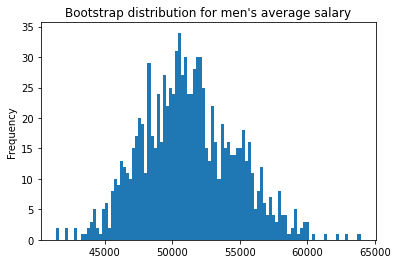

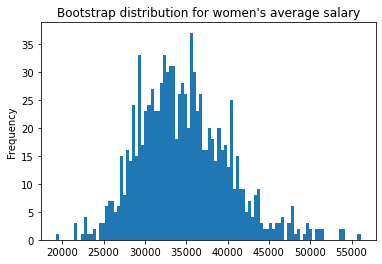

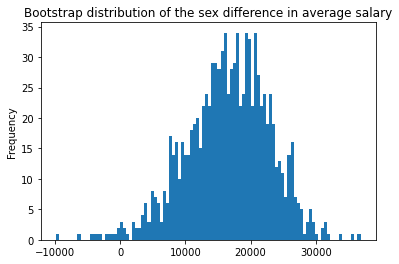

In [9]:
#c
#bookstrap data for comparing mean salary for two groups
boot_man = []
boot_woman = []
diff= []

for i in range(1000): #1000 replications
    boot_sample = df_gender.sample(replace = True, n = 1000) # take 1000 sample with replacement each iteration
    mean_man = boot_sample[df_gender['Q2']=='Man']['Q25'].mean()# calculate the mean of men's salary for each iteration
    mean_woman = boot_sample[df_gender['Q2']=='Woman']['Q25'].mean()# calculate the mean of women's salary for each iteration
    boot_man.append(mean_man) # append the mean_man to boot_man
    boot_woman.append(mean_woman) # append the mean_woman to boot_woman
    diff.append(mean_man-mean_woman)
    
# transform them into numpy array
boot_man_np = np.array(boot_man) 
boot_woman_np = np.array(boot_woman) 
diff_np = np.array(diff)

#plot histograms
plt.hist(boot_man_np,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution for men's average salary")
plt.show()

plt.hist(boot_woman_np,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution for women's average salary")
plt.show()

plt.hist(diff,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution of the sex difference in average salary")
plt.show()


In [10]:
#d
#two sample t-test with 0.05 threshold
#Null Hypothesis: Average salary of men and women are equal.
#Alternative Hypothesis: Average salary of men and women are different.
#t-test
t2,p2=stats.ttest_ind(boot_man_np, boot_woman_np, equal_var=True)
print("t-test: t-statistic = %g  p-value = %g" % (t2, p2))

t-test: t-statistic = 80.7761  p-value = 0


Since p-value is 0, which is smaller than 0.05, so we have significant evidence to reject null hypothesis. The average salary of men and women are different, and the average salary of men is higher than women.

e. Based on previous two-sample t-tests, there is significant evidence that the average salary of men and women are not the same. From bootstrap distributions figures, we can see the men's mean salary is much higher than women. With the bootstrapped data, most of the differences of mean salary for different sex locates between $10,000 and $20,000.

In [11]:
#3
#estimating the difference of average salary(Q25) between highest level of formal education(Q4)

#a
#select 'Bachelor's degree', 'Master’s degree', 'Doctoral's degree' from the dataset
#df['Q4'].unique() ##check name
df2=df.loc[df['Q4'].isin(['Bachelor’s degree','Master’s degree','Doctoral degree'])]
#select filtered gender and salary from df
df_highedu=df2[['Q4','Q25']]
#check if remove missing data necessary
print(df_highedu.isnull().sum(), '\nNo missing data.')
#descriptive statistics
df_highedu.groupby('Q4').describe()

Q4     0
Q25    0
dtype: int64 
No missing data.


Q25                                               \
                    count          mean            std     min     25%   
Q4                                                                       
Bachelor’s degree  4777.0  35578.291815   89382.060777  1000.0  1000.0   
Doctoral degree    2217.0  70641.181777  117160.947589  1000.0  4000.0   
Master’s degree    6799.0  52706.868657   90928.786678  1000.0  3000.0   

                                                
                       50%      75%        max  
Q4                                              
Bachelor’s degree   7500.0  40000.0  1000000.0  
Doctoral degree    40000.0  90000.0  1000000.0  
Master’s degree    25000.0  70000.0  1000000.0

In [15]:
#b
#ANOVA
#Null hypothesis: Average salary of Bachelor’s degree, Master’s degree and Doctoral degree are equal.
#Alternative hypothesis: Average salary of Bachelor’s degree, Master’s degree and Doctoral degree are not all equal.

#divided into three groups
ba=df_highedu.loc[df['Q4'] == 'Bachelor’s degree']
ma=df_highedu.loc[df['Q4'] == 'Master’s degree']
doc=df_highedu.loc[df['Q4'] == 'Doctoral degree']
#one way ANOVA
f3,p3=stats.f_oneway(ba['Q25'], ma['Q25'], doc['Q25'])
print("ANOVA: statistic = %g  p-value = %g" % (f3, p3))

ANOVA: statistic = 109.758  p-value = 5.1077e-48


Since p-value is around 5.11e-48, which is smaller than 0.05, so we have significant evidence to reject that the average salary of Bachelor’s degree, Master’s degree and Doctoral degree are equal. Therefore, there is at least one mean salary different from others.

<ipython-input-13-bd4c0d5a6de7>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_ba = boot_sample[df_highedu['Q4']=='Bachelor’s degree']['Q25'].mean()
<ipython-input-13-bd4c0d5a6de7>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_ma = boot_sample[df_highedu['Q4']=='Master’s degree']['Q25'].mean()
<ipython-input-13-bd4c0d5a6de7>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_doc = boot_sample[df_highedu['Q4']=='Doctoral degree']['Q25'].mean()


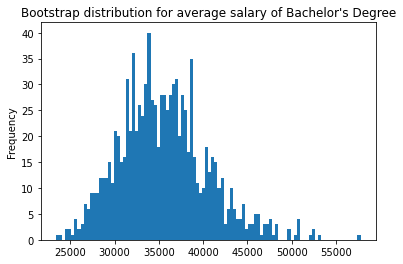

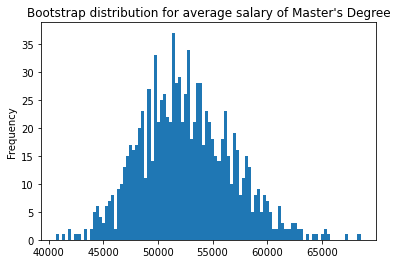

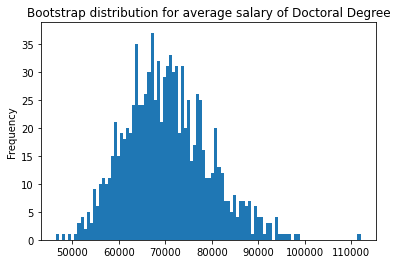

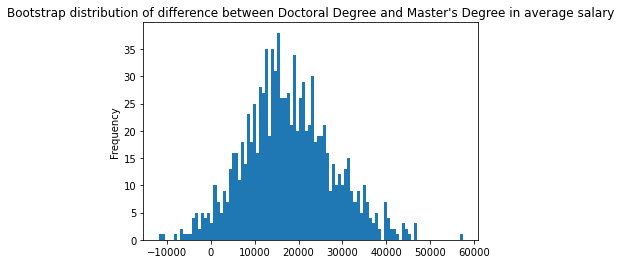

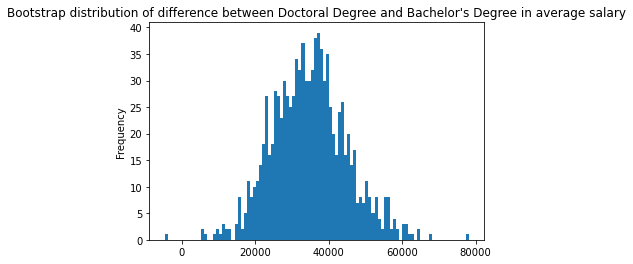

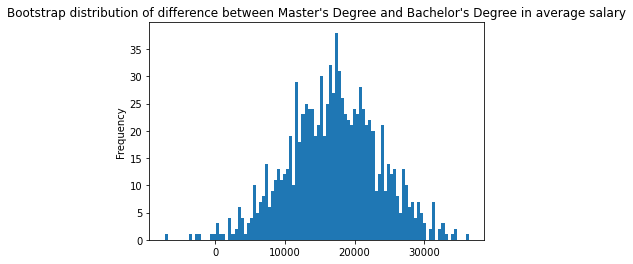

In [13]:
#c
#bookstrap data for comparing mean salary for three groups
boot_ba = []
boot_ma = []
boot_doc = []
diff1= []
diff2= []
diff3= []
for i in range(1000): #1000 replications
    boot_sample = df_highedu.sample(replace = True, n = 1000) # take 1000 sample with replacement each iteration
    # calculate the mean for each iteration
    mean_ba = boot_sample[df_highedu['Q4']=='Bachelor’s degree']['Q25'].mean()
    mean_ma = boot_sample[df_highedu['Q4']=='Master’s degree']['Q25'].mean()
    mean_doc = boot_sample[df_highedu['Q4']=='Doctoral degree']['Q25'].mean()
    #append
    boot_ba.append(mean_ba) 
    boot_ma.append(mean_ma) 
    boot_doc.append(mean_doc) 
    diff1.append(mean_doc-mean_ma)# difference between doctoral degree and master's degree
    diff2.append(mean_doc-mean_ba)# difference between doctoral degree and bachelor's degree
    diff3.append(mean_ma-mean_ba)# difference between bachelor's degree and master's degree
    
# transform them into numpy array
boot_ba_np = np.array(boot_ba) 
boot_ma_np = np.array(boot_ma) 
boot_doc_np = np.array(boot_doc)
diff1_np = np.array(diff1)
diff2_np = np.array(diff2)
diff3_np = np.array(diff3)

#plot histograms
plt.hist(boot_ba_np,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution for average salary of Bachelor's Degree")
plt.show()

plt.hist(boot_ma_np,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution for average salary of Master's Degree")
plt.show()

plt.hist(boot_doc_np,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution for average salary of Doctoral Degree")
plt.show()

plt.hist(diff1,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution of difference between Doctoral Degree and Master's Degree in average salary")
plt.show()

plt.hist(diff2,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution of difference between Doctoral Degree and Bachelor's Degree in average salary")
plt.show()

plt.hist(diff3,bins=100)
plt.ylabel('Frequency')
plt.title("Bootstrap distribution of difference between Master's Degree and Bachelor's Degree in average salary")
plt.show()

In [16]:
#d
#ANOVA
#Null hypothesis: Average salary of Bachelor’s degree, Master’s degree and Doctoral degree are equal.
#Alternative hypothesis: Average salary of Bachelor’s degree, Master’s degree and Doctoral degree are not all equal.
f4,p4=stats.f_oneway(boot_ba_np, boot_ma_np, boot_doc_np)
print("ANOVA: statistic = %g  p-value = %g" % (f4, p4))

ANOVA: statistic = 7332.13  p-value = 0


Since p-value is 0, which is smaller than 0.05, so we have significant evidence to reject that the average salary of Bachelor’s degree, Master’s degree and Doctoral degree are equal. Therefore, there is at least one mean salary different from others.

e. Based on previous ANOVA test, we have significant evidence to reject that the average salary of Bachelor’s degree, Master’s degree and Doctoral degree are equal. From bootstrappted distribution plots of Bachelor’s degree, Master’s degree and Doctoral degree, we can see each group's mean salary is different from others. Above bootstrappted distribution difference plots show that the mean salary difference between Doctoral Degree and Bachelor's Degree is the highest, mean salary difference between Master and Doctoral and difference between Master and Bachelor is similar.